import json
import pickle
import numpy as np
from tensorflow import keras
import colorama
import pandas as pd
from colorama import Fore, Style

In [22]:
# Importing the necessary libraries
import nltk
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()
import json
import pickle

import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.optimizers import SGD
import random


# Import necessary libraries for EDA
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [23]:
!pip install wordcloud


Defaulting to user installation because normal site-packages is not writeable


In [24]:
from wordcloud import wordcloud

In [25]:
words = []
classes = []
documents = []
ignore_words = ['?', '!']
data_file = open('intents.json').read()

In [26]:
intents = json.loads(data_file)

In [28]:
# Convert intents data to a Pandas DataFrame for EDA
intents_df = pd.json_normalize(intents['intents'])
intents_df.drop(columns='patterns', inplace=True)

In [29]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     /home/ephraim_mwereza/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [31]:
# Word frequency analysis
words = []
for intent in intents['intents']:
    for pattern in intent['patterns']:
        words.extend(nltk.word_tokenize(pattern))

word_freq = nltk.FreqDist(words)

In [34]:
# Print top 10 most common words
print(word_freq.most_common(10))

[('I', 87), ('?', 65), ('.', 48), ('you', 32), ('What', 28), ('do', 24), ('to', 24), ('mental', 24), ("n't", 21), ('about', 20)]


In [35]:
# Visualize word frequency using a wordcloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(words))

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

NameError: name 'WordCloud' is not defined

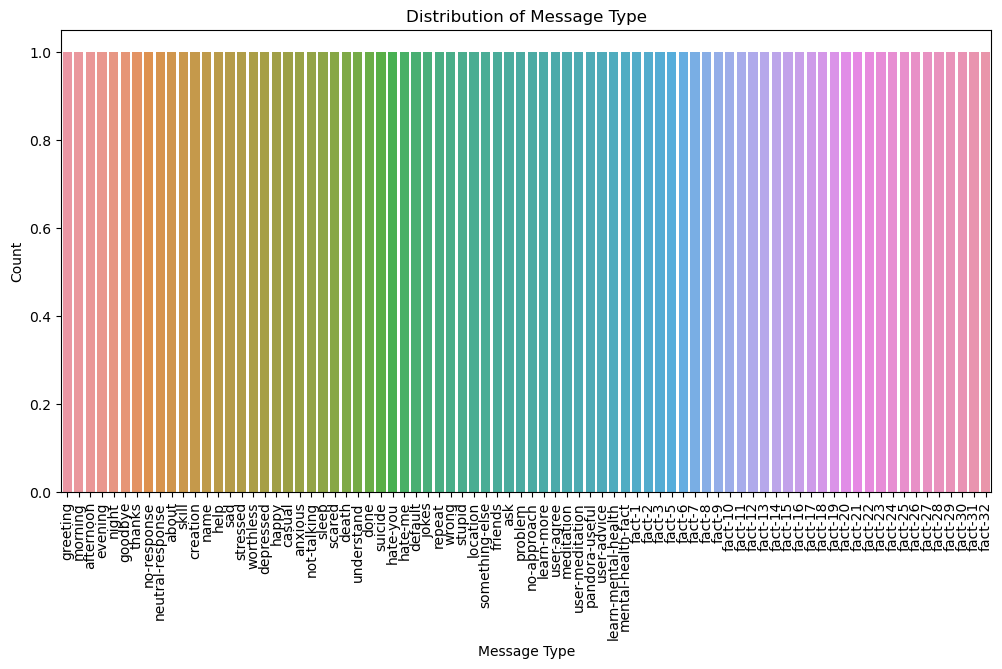

In [36]:
# Statistical visualization to examine distribution of message type
plt.figure(figsize=(12, 6))
sns.countplot(data=intents_df, x='tag')
plt.xticks(rotation=90)
plt.xlabel('Message Type')
plt.ylabel('Count')
plt.title('Distribution of Message Type')
plt.show()

In [37]:
for intent in intents['intents']:
    for pattern in intent['patterns']:

        # tokenize each word
        w = nltk.word_tokenize(pattern)
        words.extend(w)
        # add documents in the corpus
        documents.append((w, intent['tag']))

        # add to our classes list
        if intent['tag'] not in classes:
            classes.append(intent['tag'])

In [38]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     /home/ephraim_mwereza/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [39]:
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /home/ephraim_mwereza/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [40]:
# lemmaztize and lower each word and remove duplicates
words = [lemmatizer.lemmatize(w.lower()) for w in words if w not in ignore_words]
words = sorted(list(set(words)))

In [41]:
# sort classes
classes = sorted(list(set(classes)))

In [42]:
# documents = combination between patterns and intents
print(len(documents), "documents")

232 documents


In [43]:
# classes = intents
print(len(classes), "classes", classes)

80 classes ['about', 'afternoon', 'anxious', 'ask', 'casual', 'creation', 'death', 'default', 'depressed', 'done', 'evening', 'fact-1', 'fact-10', 'fact-11', 'fact-12', 'fact-13', 'fact-14', 'fact-15', 'fact-16', 'fact-17', 'fact-18', 'fact-19', 'fact-2', 'fact-20', 'fact-21', 'fact-22', 'fact-23', 'fact-24', 'fact-25', 'fact-26', 'fact-27', 'fact-28', 'fact-29', 'fact-3', 'fact-30', 'fact-31', 'fact-32', 'fact-5', 'fact-6', 'fact-7', 'fact-8', 'fact-9', 'friends', 'goodbye', 'greeting', 'happy', 'hate-me', 'hate-you', 'help', 'jokes', 'learn-mental-health', 'learn-more', 'location', 'meditation', 'mental-health-fact', 'morning', 'name', 'neutral-response', 'night', 'no-approach', 'no-response', 'not-talking', 'pandora-useful', 'problem', 'repeat', 'sad', 'scared', 'skill', 'sleep', 'something-else', 'stressed', 'stupid', 'suicide', 'thanks', 'understand', 'user-advice', 'user-agree', 'user-meditation', 'worthless', 'wrong']


In [44]:
# words = all words, vocabulary
print(len(words), "unique lemmatized words", words)

297 unique lemmatized words ["'ll", "'m", "'re", "'s", "'ve", ',', '.', 'a', 'about', 'absolutely', 'advice', 'affect', 'afternoon', 'again', 'all', 'alot', 'already', 'am', 'and', 'another', 'answer', 'anxiety', 'anxious', 'any', 'anymore', 'anyone', 'anything', 'appears', 'approaching', 'are', 'ask', 'au', 'available', 'away', 'awful', 'be', 'because', 'become', 'before', 'better', 'between', 'bonjour', 'boyfriend', 'break', 'bring', 'brother', 'burned', 'by', 'bye', 'ca', 'call', 'can', 'cause', 'cheerful', 'child', 'commit', 'connection', 'continue', 'control', 'could', 'crazy', 'created', 'cure', 'dad', 'day', 'define', 'depressed', 'depression', 'deserve', 'did', 'die', 'died', 'difference', 'different', 'disorder', 'do', 'doe', 'down', 'dumb', 'else', 'empty', 'enough', 'evening', 'exam', 'fact', 'family', 'fare', 'feel', 'feeling', 'few', 'financial', 'find', 'fine', 'focus', 'for', 'friend', 'from', 'get', 'girlfriend', 'give', 'go', 'going', 'good', 'goodbye', 'great', 'group

In [45]:
pickle.dump(words, open('texts.pkl', 'wb'))
pickle.dump(classes, open('labels.pkl', 'wb'))

In [46]:
# create our training data
training = []
# create an empty array for our output
output_empty = [0] * len(classes)
# training set, bag of words for each sentence

In [47]:
for doc in documents:
    # initialize our bag of words
    bag = []
    # list of tokenized words for the pattern
    pattern_words = doc[0]
    # lemmatize each word - create base word, in attempt to represent related words
    pattern_words = [lemmatizer.lemmatize(word.lower()) for word in pattern_words]
    # create our bag of words array with 1, if word match found in current pattern
    for w in words:
        bag.append(1) if w in pattern_words else bag.append(0)

    # output is a '0' for each tag and '1' for current tag (for each pattern)
    output_row = list(output_empty)
    output_row[classes.index(doc[1])] = 1

    training.append([bag, output_row])

In [48]:
# shuffle our features and turn into np.array
random.shuffle(training)
training = np.array(training)

/tmp/ipykernel_354794/3232993347.py:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  training = np.array(training)


In [49]:
# create train and test lists. X - patterns, Y - intents
train_x = list(training[:, 0])
train_y = list(training[:, 1])
print("Training data created")

Training data created


In [50]:
# Split data into training and validation sets
split = int(0.8 * len(train_x))
train_x, val_x = train_x[:split], train_x[split:]
train_y, val_y = train_y[:split], train_y[split:]

In [51]:
# Create model - 3 layers. First layer 128 neurons, second layer 64 neurons and 3rd output layer contains number of neurons
# equal to number of intents to predict output intent with softmax
model = Sequential()
model.add(Dense(128, input_shape=(len(train_x[0]),), activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(len(train_y[0]), activation='softmax'))

2023-02-26 06:33:41.157448: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-02-26 06:33:41.166156: W tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (303)
2023-02-26 06:33:41.166248: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (ephraim-ble-mwereza): /proc/driver/nvidia/version does not exist
2023-02-26 06:33:41.193084: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [52]:
# Compile model. Stochastic gradient descent with Nesterov accelerated gradient gives good results for this model
sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

/home/ephraim_mwereza/.local/lib/python3.10/site-packages/keras/optimizers/optimizer_v2/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [53]:
# fitting and saving the model
hist = model.fit(np.array(train_x), np.array(train_y), validation_data=(np.array(val_x), np.array(val_y)), epochs=200, batch_size=5, verbose=1)
with open('model.h5', 'wb') as file:
    pickle.dump(hist.history, file)
print("model created")

Epoch 1/200
37/37 [==============================] - 2s 11ms/step - loss: 4.3777 - accuracy: 0.0054 - val_loss: 4.3560 - val_accuracy: 0.0213
Epoch 2/200
37/37 [==============================] - 0s 6ms/step - loss: 4.2984 - accuracy: 0.0486 - val_loss: 4.3235 - val_accuracy: 0.0426
Epoch 3/200
37/37 [==============================] - 0s 7ms/step - loss: 4.1965 - accuracy: 0.0757 - val_loss: 4.2932 - val_accuracy: 0.0213
Epoch 4/200
37/37 [==============================] - 0s 4ms/step - loss: 4.1135 - accuracy: 0.0649 - val_loss: 4.2569 - val_accuracy: 0.0213
Epoch 5/200
37/37 [==============================] - 0s 4ms/step - loss: 4.0089 - accuracy: 0.0865 - val_loss: 4.2363 - val_accuracy: 0.0426
Epoch 6/200
37/37 [==============================] - 0s 4ms/step - loss: 3.8636 - accuracy: 0.1514 - val_loss: 4.2461 - val_accuracy: 0.0213
Epoch 7/200
37/37 [==============================] - 0s 4ms/step - loss: 3.6514 - accuracy: 0.1405 - val_loss: 4.2243 - val_accuracy: 0.0426
Epoch 8/200


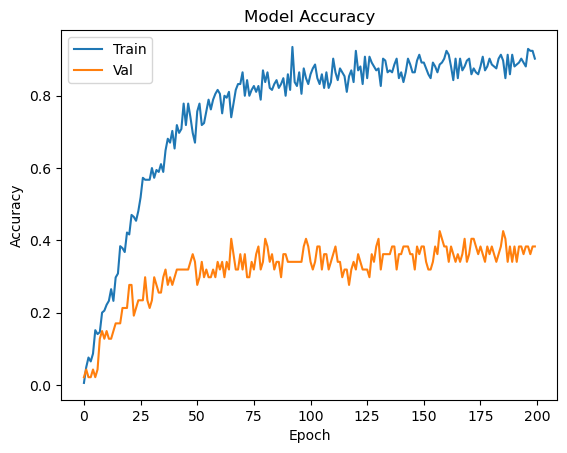

In [54]:
# plot training and validation accuracy
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

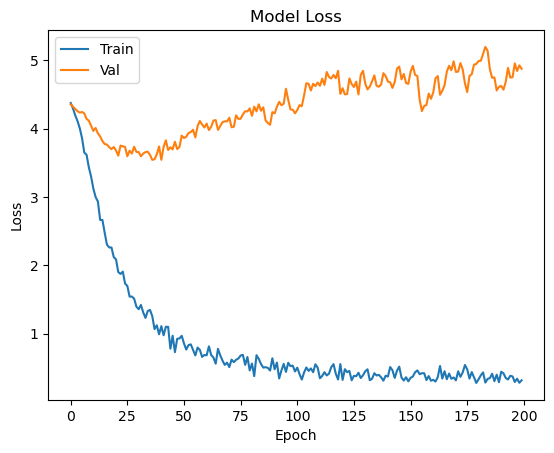

In [55]:

# plot training and validation loss
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()


In [56]:
from sklearn.metrics import classification_report

# Generate predictions for the validation set
val_predictions = model.predict(val_x)

# Convert predictions from one-hot encoding to class labels
val_preds_labels = [classes[np.argmax(pred)] for pred in val_predictions]

# Convert validation set from one-hot encoding to class labels
val_labels = [classes[np.argmax(label)] for label in val_y]

# Generate classification report
print(classification_report(val_labels, val_preds_labels, labels=classes))

2/2 [==============================] - 0s 4ms/step
                     precision    recall  f1-score   support

              about       1.00      0.33      0.50         3
          afternoon       0.00      0.00      0.00         0
            anxious       0.00      0.00      0.00         0
                ask       0.00      0.00      0.00         1
             casual       0.00      0.00      0.00         2
           creation       0.00      0.00      0.00         0
              death       0.50      1.00      0.67         1
            default       0.00      0.00      0.00         1
          depressed       0.00      0.00      0.00         1
               done       0.00      0.00      0.00         3
            evening       0.00      0.00      0.00         0
             fact-1       0.00      0.00      0.00         1
            fact-10       0.00      0.00      0.00         0
            fact-11       0.00      0.00      0.00         0
            fact-12       0.00   

/home/ephraim_mwereza/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/ephraim_mwereza/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/ephraim_mwereza/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/ephraim_mwer

In [57]:
!pip install flask-ngrok
!pip install flask-bootstrap

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 456.4/456.4 KB 142.9 kB/s eta 0:00:0000:0100:01
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for flask-bootstrap: filename=Flask_Bootstrap-3.3.7.1-py3-none-any.whl size=460123 sha256=57febb36a988c0745701e0d666736160e59881da08db15c9212b36b73f2d2888
  Stored in directory: /home/ephraim_mwereza/.cache/pip/wheels/6f/33/ad/26540e84a28334e5dfeda756df270f95353779f03bc5cf40d4
  Created wheel for visitor: filename=visitor-0.1.3-py3-none-any.whl size=3946 sha256=5b04df7cbb7353a60a9998e97b5359f75ce1c2301091bdf85707a718a32708fb
  Stored in directory: /home/ephraim_mwereza/.cache/pip/wheels/19/31/99/2ec5b4459cac4d801d6201d501a354366d180afc9f8bb2d333
Successfully built flask-bootstrap visitor


In [58]:
from flask_ngrok import run_with_ngrok
from flask import Flask, render_template , request 
from flask_bootstrap import Bootstrap


In [61]:
app = Flask(__name__)
app._static_folder = '/content/static'
bootstrap = Bootstrap(app)
run_with_ngrok(app)

@app.route("/")
def home():
    return render_template("index.html")
app.run()

 * Serving Flask app '__main__'
 * Debug mode: off


Address already in use
Port 5000 is in use by another program. Either identify and stop that program, or start the server with a different port.


AssertionError: 

Exception in thread Thread-7:
Traceback (most recent call last):
  File "/usr/lib/python3.10/threading.py", line 1016, in _bootstrap_inner
    self.run()
  File "/usr/lib/python3.10/threading.py", line 1378, in run
    self.function(*self.args, **self.kwargs)
  File "/home/ephraim_mwereza/.local/lib/python3.10/site-packages/flask_ngrok.py", line 70, in start_ngrok
    ngrok_address = _run_ngrok()
  File "/home/ephraim_mwereza/.local/lib/python3.10/site-packages/flask_ngrok.py", line 31, in _run_ngrok
    ngrok = subprocess.Popen([executable, 'http', '5000'])
  File "/usr/lib/python3.10/subprocess.py", line 969, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "/usr/lib/python3.10/subprocess.py", line 1845, in _execute_child
    raise child_exception_type(errno_num, err_msg, err_filename)
PermissionError: [Errno 13] Permission denied: '/tmp/ngrok/ngrok'
